In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("mental_health_social_media_dataset.csv")
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [89]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   str    
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   str    
 3   gender                       5000 non-null   str    
 4   platform                     5000 non-null   str    
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level                   

In [90]:
df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


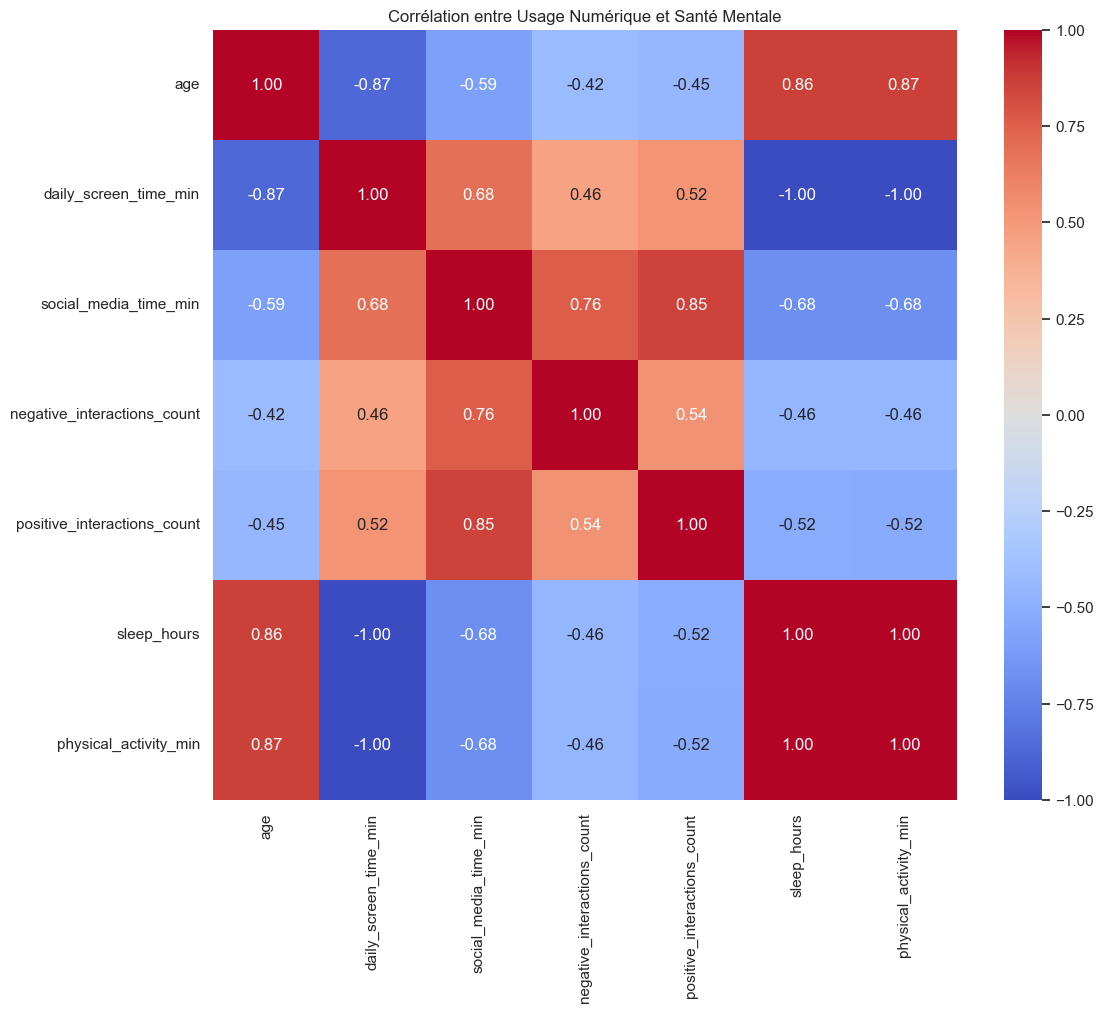

In [91]:
# Configuration du style
sns.set_theme(style="whitegrid")

# Sélection des colonnes numériques pour la corrélation
numeric_cols = [
    'age', 'daily_screen_time_min', 'social_media_time_min',
    'negative_interactions_count', 'positive_interactions_count',
    'sleep_hours', 'physical_activity_min', 
    
]

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Corrélation entre Usage Numérique et Santé Mentale")
plt.show()


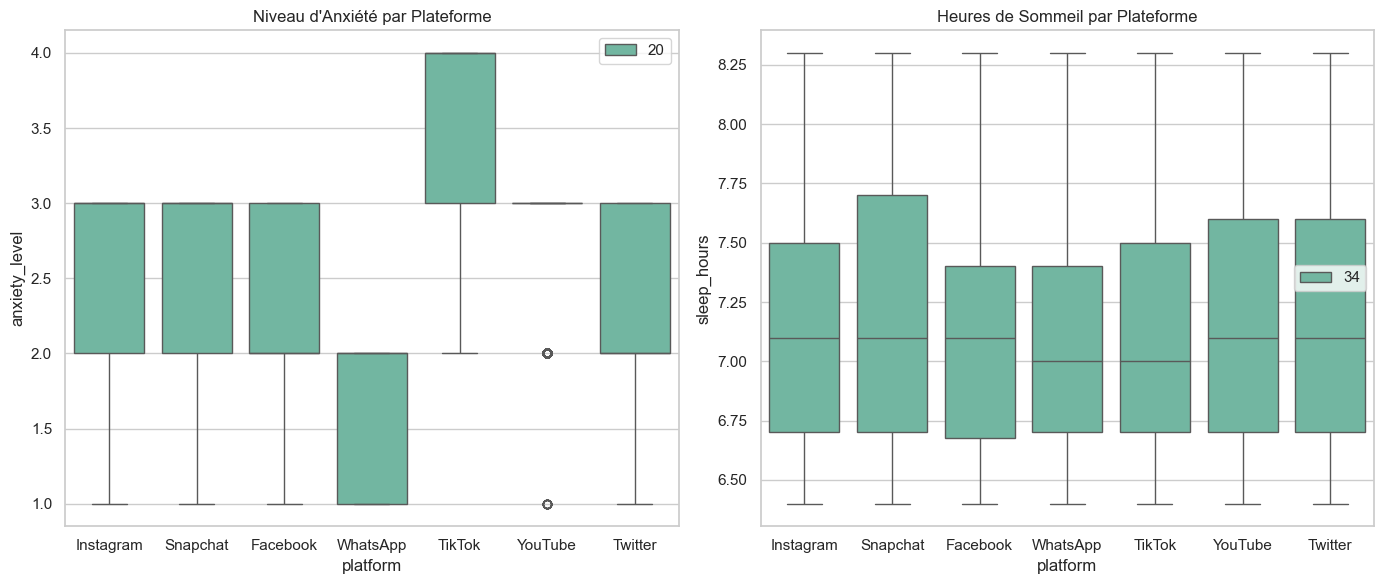

In [92]:
plt.figure(figsize=(14, 6))

# Boxplot du niveau d'anxiété par plateforme
plt.subplot(1, 2, 1)
sns.boxplot(x='platform', y='anxiety_level',legend='auto', data=df, palette="Set2",hue=20)
plt.title("Niveau d'Anxiété par Plateforme")

# Boxplot des heures de sommeil par plateforme
plt.subplot(1, 2, 2)
sns.boxplot(x='platform', y='sleep_hours',legend='auto', data=df, palette="Set2",hue=34)
plt.title("Heures de Sommeil par Plateforme")

plt.tight_layout()
plt.show()


In [93]:
# Nettoyage du dataset selon les consignes du projet
print("Suppression des colonnes anxiété, stress, humeur, nom de la personne et date pour eviter la fuite de données")
print("Colonnes avant nettoyage:", df.columns.tolist())

# Supprimer les colonnes demandées
columns_to_drop = ['person_name', 'date', 'anxiety_level', 'stress_level', 'mood_level']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print("\nColonnes après nettoyage:", df.columns.tolist())

else: 
    print("\nColonnes après nettoyage:", df.columns.tolist())
    print("Aucune colonne à supprimer")

df.head()

Suppression des colonnes anxiété, stress, humeur, nom de la personne et date pour eviter la fuite de données
Colonnes avant nettoyage: ['person_name', 'age', 'date', 'gender', 'platform', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state']

Colonnes après nettoyage: ['age', 'gender', 'platform', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'mental_state']


,age,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,mental_state
0,35,Male,Instagram,320,160,1,2,7.4,28,Stressed
1,24,Female,Instagram,453,226,1,3,6.7,15,Stressed
2,26,Male,Snapchat,357,196,1,2,7.2,24,Stressed
3,66,Female,Snapchat,190,105,0,1,8.0,41,Stressed
4,31,Male,Snapchat,383,211,1,2,7.1,22,Stressed


--- Rapport de Classification ---
              precision    recall  f1-score   support

     At_Risk       1.00      1.00      1.00        12
     Healthy       1.00      1.00      1.00        73
    Stressed       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



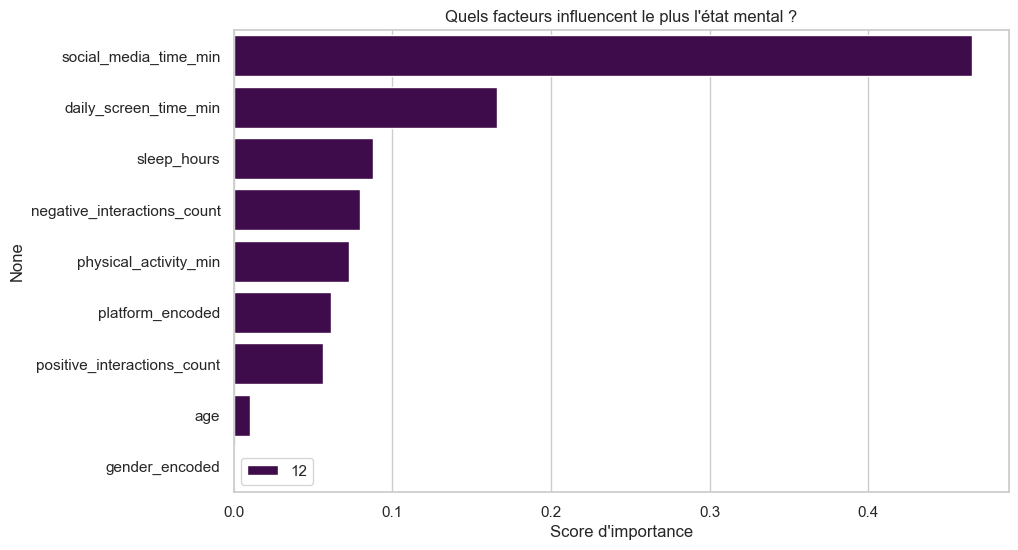

In [94]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 1. Encodage des variables catégorielles (Gender, Platform)
le_gender = LabelEncoder()
la_platform = LabelEncoder()
# On garde une copie pour le ML
df_ml = df.copy()
df_ml['gender_encoded'] = le_gender.fit_transform(df_ml['gender'])
df_ml['platform_encoded'] = la_platform.fit_transform(df_ml['platform'])

# 2. Définition des features (X) et de la cible (y)
# On retire les colonnes "résultats" trop évidentes (anxiety_level, stress_level, mood_level) 
# pour voir si l'usage SEUL peut prédire l'état mental.
features = [
    'age', 'gender_encoded', 'platform_encoded', 
    'daily_screen_time_min', 'social_media_time_min',
    'negative_interactions_count', 'positive_interactions_count',
    'sleep_hours', 'physical_activity_min'
]
target = 'mental_state'

X = df_ml[features]
y = df_ml[target]

# 3. Séparation Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Évaluation
y_pred = model.predict(X_test)
print("--- Rapport de Classification ---")
print(classification_report(y_test, y_pred))

# 6. Importance des variables
feature_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis",hue=12)
plt.title("Quels facteurs influencent le plus l'état mental ?")
plt.xlabel("Score d'importance")
plt.show()


In [95]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# --- Paramètres modifiables ---
SCORING = 'accuracy'
# SCORING = 'recall_macro'   
# SCORING = 'f1_macro'   
RANDOM_STATE = 42
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [96]:
#  Préparation et nettoyage 
df_ml = df.copy()
df_ml = df_ml.drop_duplicates()
df_ml['gender_encoded'] = LabelEncoder().fit_transform(df_ml['gender'])
df_ml['platform_encoded'] = LabelEncoder().fit_transform(df_ml['platform'])

features = ['age','gender_encoded','platform_encoded',
            'daily_screen_time_min','social_media_time_min',
            'negative_interactions_count','positive_interactions_count',
            'sleep_hours','physical_activity_min']
X = df_ml[features]
y = df_ml['mental_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=RANDOM_STATE)

In [97]:
def run_grid(name, estimator, grid):
    print(f"\n--- {name} GridSearch ---")
    gs = GridSearchCV(estimator, grid, cv=CV, scoring=SCORING, n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    best = gs.best_estimator_
    print("Best params:", gs.best_params_)
    print(f"CV best score: {gs.best_score_:.4f}")
    y_pred = best.predict(X_test)
    print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    return best, gs

In [98]:
# Régression logistique
pipe_lr = Pipeline([('scaler', StandardScaler()),
                    ('model', LogisticRegression(solver='saga', max_iter=5000, random_state=RANDOM_STATE))])
grid_lr = {
    'model__C': [1, 10, 100],
    'model__penalty': ['l1','l2'],
    'model__class_weight': [None, 'balanced']
}
best_lr, gs_lr = run_grid("LogisticRegression", pipe_lr, grid_lr)


--- LogisticRegression GridSearch ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\poiri\OneDrive\Desktop\Documents\EPSI\B3\Projets\healthdata\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\poiri\OneDrive\Desktop\Documents\EPSI\B3\Projets\healthdata\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Best params: {'model__C': 100, 'model__class_weight': None, 'model__penalty': 'l1'}
CV best score: 0.9899
Test accuracy: 0.9894
              precision    recall  f1-score   support

     At_Risk       1.00      0.82      0.90        11
     Healthy       0.93      0.96      0.94        67
    Stressed       0.99      0.99      0.99       864

    accuracy                           0.99       942
   macro avg       0.97      0.92      0.95       942
weighted avg       0.99      0.99      0.99       942



In [99]:
# Arbre de décision
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}
best_dt, gs_dt = run_grid("DecisionTree", dt, grid_dt)


--- DecisionTree GridSearch ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV best score: 1.0000
Test accuracy: 1.0000
              precision    recall  f1-score   support

     At_Risk       1.00      1.00      1.00        11
     Healthy       1.00      1.00      1.00        67
    Stressed       1.00      1.00      1.00       864

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942



In [100]:
# SVM
pipe_svc = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(probability=True, random_state=RANDOM_STATE))])
grid_svc = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['rbf', 'linear'],
    'model__gamma': ['scale', 'auto']
}
best_svc, gs_svc = run_grid("SVM", pipe_svc, grid_svc)


--- SVM GridSearch ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}
CV best score: 0.9899
Test accuracy: 0.9915
              precision    recall  f1-score   support

     At_Risk       0.91      0.91      0.91        11
     Healthy       0.95      0.94      0.95        67
    Stressed       1.00      1.00      1.00       864

    accuracy                           0.99       942
   macro avg       0.95      0.95      0.95       942
weighted avg       0.99      0.99      0.99       942



In [ ]:
# Comparaison finale
print("\nComparaison finale :")
for name, model in [('- Régression logistique', best_lr), ('- Arbre de décision', best_dt), ('- SVM', best_svc)]:
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: {acc:.4f}")


Comparaison finale :
- Régression logistique: 0.9894
- Arbre de décision: 1.0000
- SVM: 0.9915
